In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

# Introducción




# Abre el archivo de datos y estudia la información general **(Parte 1)**

In [31]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/sprint_6/games.csv'

df = pd.read_csv(url)

In [32]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3722,Greg Hastings' Tournament Paintball,XB,2004.0,Shooter,0.46,0.06,0.00,0.02,74.0,9.2,T
12544,Flipnic: Ultimate Pinball,PS2,2003.0,Misc,0.03,0.02,0.00,0.01,64.0,8.1,E
8167,DiRT Showdown,PS3,2012.0,Racing,0.02,0.12,0.00,0.03,75.0,6.3,E10+
14740,Mega Minis Volume 2,PSP,2011.0,Misc,0.00,0.02,0.00,0.01,NaN,NaN,NaN
7967,Star Wars: The Clone Wars & Tetris Worlds,XB,2002.0,Misc,0.14,0.04,0.00,0.01,NaN,NaN,NaN
1765,Medal of Honor: Warfighter,X360,2012.0,Action,0.59,0.45,0.01,0.10,53.0,5.4,M
5676,Goosebumps HorrorLand,DS,2008.0,Adventure,0.29,0.00,0.00,0.02,NaN,tbd,E10+
14990,Derby Time 2006,PSP,2006.0,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+
3040,Naruto Shippuden: Ultimate Ninja 4,PS2,2007.0,Fighting,0.26,0.01,0.13,0.26,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Descripción del Dataset

Basado en la información general obtenida en la **Parte 1**, el dataset contiene información sobre videojuegos. Las columnas presentes son:

- `Name`: Nombre del juego (Object)
- `Platform`: Plataforma del juego (Object)
- `Year_of_Release`: Año de lanzamiento (Float64)
- `Genre`: Género del juego (Object)
- `NA_sales`: Ventas en Norteamérica (Float64)
- `EU_sales`: Ventas en Europa (Float64)
- `JP_sales`: Ventas en Japón (Float64)
- `Other_sales`: Ventas en otras regiones (Float64)
- `Critic_Score`: Puntuación de los críticos (Float64)
- `User_Score`: Puntuación de los usuarios (Object)
- `Rating`: Clasificación ESRB (Object)

Se han identificado valores nulos en las columnas `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, y `Rating`. La columna `User_Score` tiene el tipo de dato 'Object' y contiene el valor 'tbd', lo que sugiere que deberá ser convertida a tipo numérico y manejar este valor especial.

# Sugerencias para la Preparación de Datos

Para preparar los datos adecuadamente, se sugieren los siguientes pasos:

1.  **Manejar valores nulos**:
    *   Identificar y decidir cómo manejar los valores nulos en las columnas. Para `Year_of_Release`, se podría considerar imputar con la mediana o moda, o incluso eliminar filas si el número de nulos es pequeño. Para las columnas de puntuación (`Critic_Score`, `User_Score`) y `Rating`, que tienen un número considerable de valores nulos, se deberá evaluar si es mejor imputar (considerando la distribución) o si es aceptable mantener los nulos para ciertos análisis, o incluso eliminar la columna si la cantidad de nulos es muy alta y no hay una estrategia de imputación clara. Las filas con valores nulos en `Name` y `Genre` probablemente puedan eliminarse dado su bajo recuento.
2.  **Convertir tipos de datos**:
    *   Convertir la columna `Year_of_Release` a tipo entero (`int`) ya que representa años.
    *   Convertir la columna `User_Score` a tipo numérico (`float`). Es necesario manejar el valor 'tbd' antes de la conversión, posiblemente reemplazándolo por `NaN`.
3.  **Manejar duplicados**:
    *   Verificar si existen filas duplicadas en el dataset y eliminarlas si las hay para asegurar la unicidad de las observaciones.
4.  **Calcular ventas totales**:
    *   Crear una nueva columna que represente las ventas totales sumando las ventas de todas las regiones (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`). Esta columna será útil para los análisis posteriores.

# Prepara los datos **(Parte 2)**

## Reemplaza los nombres de las columnas

In [34]:
def cols_names_lower(df):
  df.columns = [col.lower() for col in df.columns]
  return df

In [35]:
df = cols_names_lower(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Para facilitar el manejo y la consistencia en el código, se han convertido todos los nombres de las columnas a minúsculas. Esto ayuda a evitar errores de escritura y hace que el código sea más legible al no tener que recordar la capitalización exacta de cada columna.

## Tratar los valores nulos

### ['name']

In [36]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [37]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se eliminaron las filas con valores nulos en la columna `name`, ya que solo eran dos y no proporcionaban información útil para el análisis.

### [year_of_release]

In [38]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [39]:
df['year_of_release'].describe()


,year_of_release
count,16444.000000
mean,2006.486256
std,5.875525
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


In [40]:
df['year_of_release'].mode()

,year_of_release
0,2008.0


In [41]:
def mode_platform(df, platform):
  return df[df['platform'] == platform]['year_of_release'].mode()[0]

In [42]:
mode_platform(df, 'X360')

np.float64(2011.0)

In [43]:
for index, row in df[df['year_of_release'].isna()].iterrows():
    platform = row['platform']
    mode_year = mode_platform(df, platform)
    df.loc[index, 'year_of_release'] = mode_year

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [44]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
989,LEGO Star Wars III: The Clone Wars,Wii,2011.0,Action,1.01,0.6,0.00,0.15,76.0,7.7,E10+
6242,Nichibutsu Arcade Classics,SNES,1995.0,Misc,0.00,0.0,0.28,0.00,NaN,NaN,NaN
16221,Winning Post 7 Maximum 2008,PS3,2008.0,Sports,0.00,0.0,0.01,0.00,NaN,NaN,NaN
13440,Brave Story: New Traveller (jp sales),PSP,2006.0,Role-Playing,0.00,0.0,0.05,0.00,NaN,NaN,NaN
5837,Naruto: Ninja Destiny (US sales),DS,2006.0,Fighting,0.30,0.0,0.00,0.00,NaN,NaN,NaN


Los valores nulos en la columna `year_of_release` fueron imputados utilizando la moda del año de lanzamiento para cada plataforma. Esto se hizo para mantener la mayor cantidad de datos posible y basar la imputación en la distribución de años dentro de cada plataforma.

### [critic_score]

In [45]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [46]:
df['critic_score'].describe()

,critic_score
count,8137.000000
mean,68.967679
std,13.938165
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


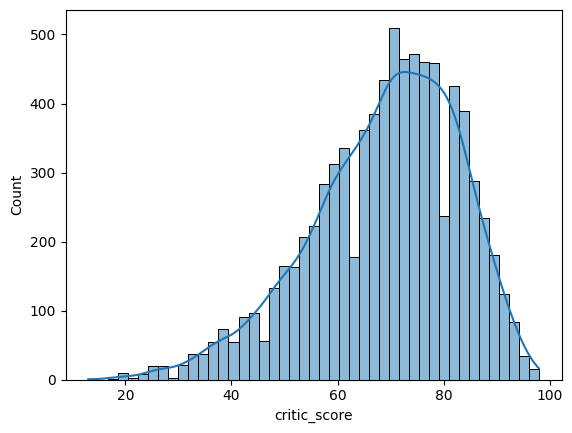

In [47]:
sns.histplot(
    df['critic_score'],
    kde=True,)
plt.show()

In [48]:
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


/tmp/ipython-input-3541487147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(df['critic_score'].median(), inplace=True)


Los valores nulos en la columna `critic_score` fueron imputados con la mediana. Se decidió utilizar la mediana ya que la distribución de las puntuaciones de los críticos parece ligeramente sesgada, y la mediana es menos sensible a los valores atípicos que la media.

### ['user_score']

In [49]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN


In [50]:
df['user_score'].describe()

,user_score
count,10014
unique,96
top,tbd
freq,2424


"TBD" es la abreviatura de "To Be Determined" (Por determinar), y se usa para indicar que algo aún no está definido pero se definirá en el futuro.
- TBD (To Be Determined): Significa que el resultado aún no está definido y se anunciará más adelante.
- Puntuación: En este contexto, se refiere a una calificación o un valor asignado por los usuarios, como en una página de reseñas.

In [51]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [52]:
df['user_score'] = df['user_score'].astype(float)

In [53]:
df['user_score'].describe()

,user_score
count,7590.000000
mean,7.125046
std,1.500006
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


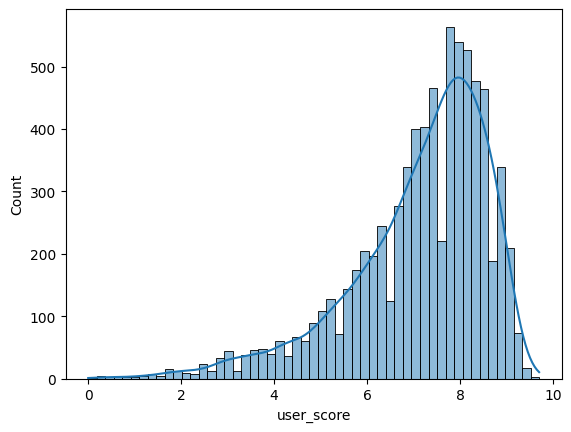

In [54]:
sns.histplot(
    df['user_score'],
    kde=True,)
plt.show()

In [55]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


Los valores 'tbd' en la columna `user_score` fueron reemplazados por `NaN` y luego la columna fue convertida a tipo numérico. Los valores nulos resultantes fueron imputados con la mediana. Finalmente, se visualizó la distribución de las puntuaciones de los usuarios utilizando un histograma para entender mejor su comportamiento.

### Explicación

En la sección "Tratar los valores nulos", se llevaron a cabo las siguientes acciones para manejar los valores faltantes en el dataset:

*   **`name`**: Se eliminaron las dos filas con valores nulos en esta columna, ya que representaban un porcentaje muy pequeño del dataset y no era posible imputar los nombres de los juegos de manera fiable.
*   **`year_of_release`**: Los valores nulos en esta columna se imputaron con la moda del año de lanzamiento para cada plataforma. Esta estrategia se eligió para mantener la mayor cantidad de datos posible y basar la imputación en el comportamiento típico de lanzamiento de juegos por plataforma.
*   **`critic_score`**: Los valores nulos se imputaron con la mediana de las puntuaciones de los críticos. La mediana fue seleccionada debido a que la distribución de las puntuaciones parecía ligeramente sesgada, siendo menos sensible a valores atípicos que la media.
*   **`user_score`**: Los valores 'tbd' se reemplazaron por `NaN` y luego la columna se convirtió a tipo numérico. Los valores nulos resultantes (incluyendo los 'tbd' originales y otros nulos) se imputaron con la mediana de las puntuaciones de los usuarios. Se utilizó la mediana por razones similares a las de `critic_score` y porque 'tbd' no representa un valor numérico real.

## Convierte los datos en los tipos necesarios.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


### year_of_release

In [60]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


La columna `year_of_release` fue convertida a tipo entero (`int`) ya que representa años, y los años son valores discretos y no requieren precisión decimal. Esta conversión asegura que el tipo de dato refleje correctamente la naturaleza de la información.